## CPLEX example

This notebook demonstrates how to use `optiwindnet` to design collector system cable layouts using the **CPLEX MILP router**.

In [1]:
from optiwindnet.api import WindFarmNetwork, Heuristic, MILP, load_repository

In [2]:
# Display figures as SVG in Jupyter notebooks
%config InlineBackend.figure_formats = ['svg']

In [3]:
from pyomo import environ as pyo

### Initialize Race Bank 2

>In this example, the `load_repository()` functionality is used to load a prebuilt *Networkx.Graph*. For more details on this functionality look into the notebook about [Load repositories containing location data](api_02-load-repositories.ipynb).

In [4]:
locations = load_repository()

In [5]:
L = locations.race
max_cables_capacity = 5

In [6]:
wfn = WindFarmNetwork(L=L, cables=max_cables_capacity)

### Optimize Race Bank 2

Initial heuristic solution to warm-start the solver:

In [7]:
router_warmstart = Heuristic(solver='Esau_Williams')
res_warmstart= wfn.optimize(router=router_warmstart)
print(wfn.length())

94059.52543431189


In [8]:
router_milp = MILP(solver_name='cplex', time_limit=20, mip_gap=0.002, verbose=True)
res = wfn.optimize(router=router_milp)

>>> Using warm start: the model is initialized with the provided solution S <<<
Version identifier: 22.1.2.0 | 2024-11-25 | 0edbb82fd
CPXPARAM_Read_DataCheck                          1
CPXPARAM_Parallel                                -1
CPXPARAM_Emphasis_MIP                            4
CPXPARAM_TimeLimit                               20
CPXPARAM_MIP_Tolerances_MIPGap                   0.002
1 of 1 MIP starts provided solutions.
MIP start 'm1' defined initial solution with objective 93274.5215.
Tried aggregator 1 time.
MIP Presolve eliminated 368 rows and 0 columns.
MIP Presolve modified 1040 coefficients.
Reduced MIP has 2740 rows, 2080 columns, and 9890 nonzeros.
Reduced MIP has 1040 binaries, 1040 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.02 sec. (7.87 ticks)
Probing time = 0.00 sec. (2.90 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 2740 rows, 2080 columns, and 9890 nonzeros.
Reduced MIP has 1040 binaries, 1040 generals, 0 SOSs, and 0 indicato

Advanced basis not built.



GUB cover cuts applied:  2
Flow cuts applied:  19
Mixed integer rounding cuts applied:  58
Zero-half cuts applied:  38
Lift and project cuts applied:  27
Gomory fractional cuts applied:  3

Root node processing (before b&c):
  Real time             =    4.20 sec. (1727.74 ticks)
Parallel b&c, 8 threads:
  Real time             =   15.84 sec. (7057.44 ticks)
  Sync time (average)   =    0.03 sec.
  Wait time (average)   =    0.00 sec.
                          ------------
Total (root+branch&cut) =   20.05 sec. (8785.18 ticks)
containing a solution


In [9]:
wfn.G.SolutionInfo

SolutionInfo(runtime=20.05889368057251, bound=87167.38191042392, objective=87802.98827587755, relgap=0.00723900607410477, termination='maxTimeLimit')

In [10]:
wfn.length()

87802.98827587756

<Axes: >

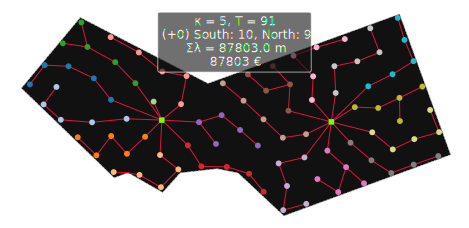

In [11]:
wfn.plot()